In [116]:
#Import all the required library as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nbformat.sign import algorithms
from patsy.state import standardize
from statsmodels.tools import categorical
%matplotlib inline
import warnings as warnings
warnings.filterwarnings('ignore')

In [117]:
#read the dataset
df1=pd.read_csv("sales_data_with_discounts.csv")

In [118]:
df1

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [119]:
df1.info() #check for null and datatype of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


#There are no null value present in the dataframe.

In [120]:
#separate the numerical column as df1_num
df1_num=df1.select_dtypes(include="number")
df1_num.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [121]:
df1_num.describe() #find all statistical measurement of all numerical columns.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [122]:
allstats = {'mean': df1_num.mean(),'median': df1_num.median(),'mode': df1_num.mode().iloc[0],'std': df1_num.std()}
summary = pd.DataFrame(allstats)
print(summary)

                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


Summary of statistics:
The columns Avg Price and Total Sales Value are highly skewed as their mean is much higher than the median and mode.

The Volume is concentrated around 4 to 5 units per sale.

In all pricing and sales columns show high standard deviation thst indicates outliers or a diverse in the product.

Visulization:

Histogram:(using Distplot-histogram and curve)

<Axes: xlabel='Net Sales Value', ylabel='Density'>

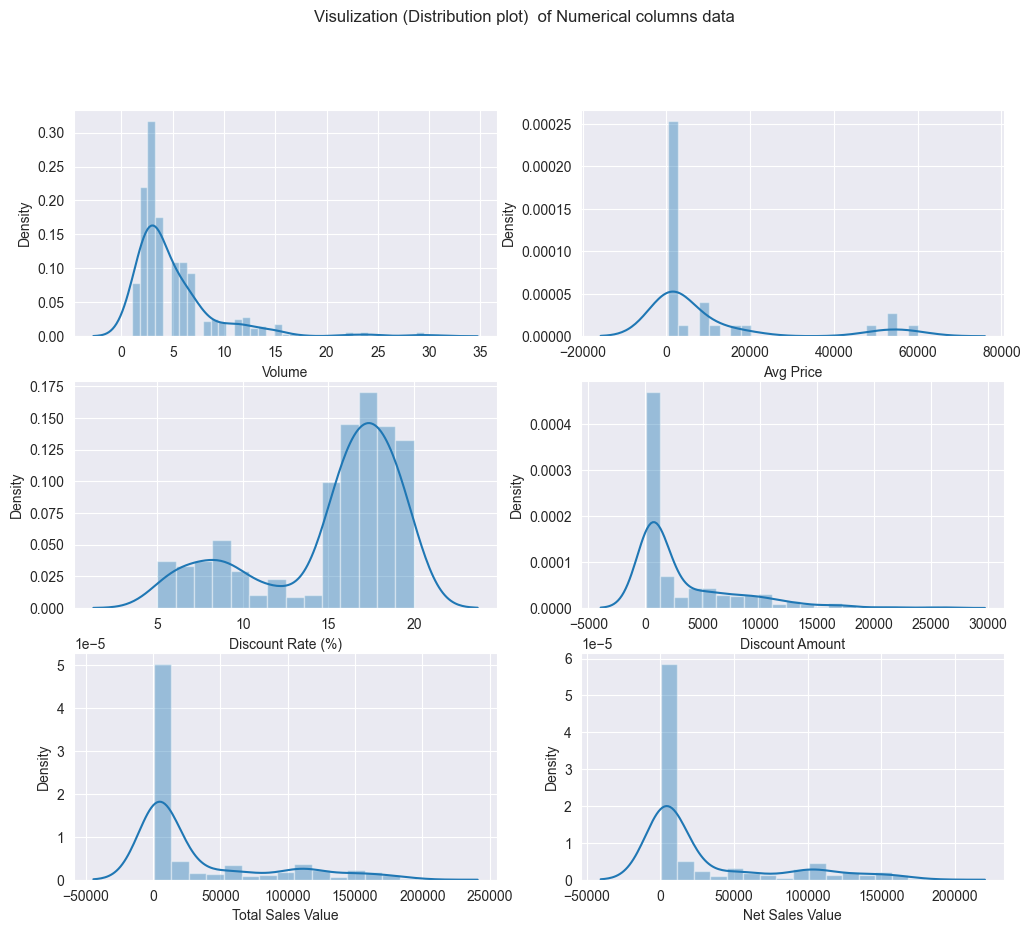

In [123]:
figdf1, axessbi = plt.subplots(3, 2, figsize=(12,10))
plt.suptitle("Visulization (Distribution plot)  of Numerical columns data")
sns.distplot(df1["Total Sales Value"],ax=axessbi[2,0])
sns.distplot(df1["Volume"],ax=axessbi[0,0])
sns.distplot(df1["Discount Rate (%)"],ax=axessbi[1,0])
sns.distplot(df1["Discount Amount"],ax=axessbi[1,1])
sns.distplot(df1["Avg Price"],ax=axessbi[0,1])
sns.distplot(df1["Net Sales Value"],ax=axessbi[2,1])

In the Volume shows right-skewed distribution and its most values are between 1 and 5, with some higher values.

In the Avg Price shows highly right-skewed with a significant large number of products which prices are low and some high-priced outliers.

In the Total Sales Value is very similar to Avg Price that indicates that high-value transactions are less but significant.

In Discount Rate (%) is normally distributed around 15–16%.

In the Discount Amount and Net Sales Value, Both show a long right tail, indicating a few large discounts and high net sales in between smaller transactions.

Boxplots:

<Axes: >

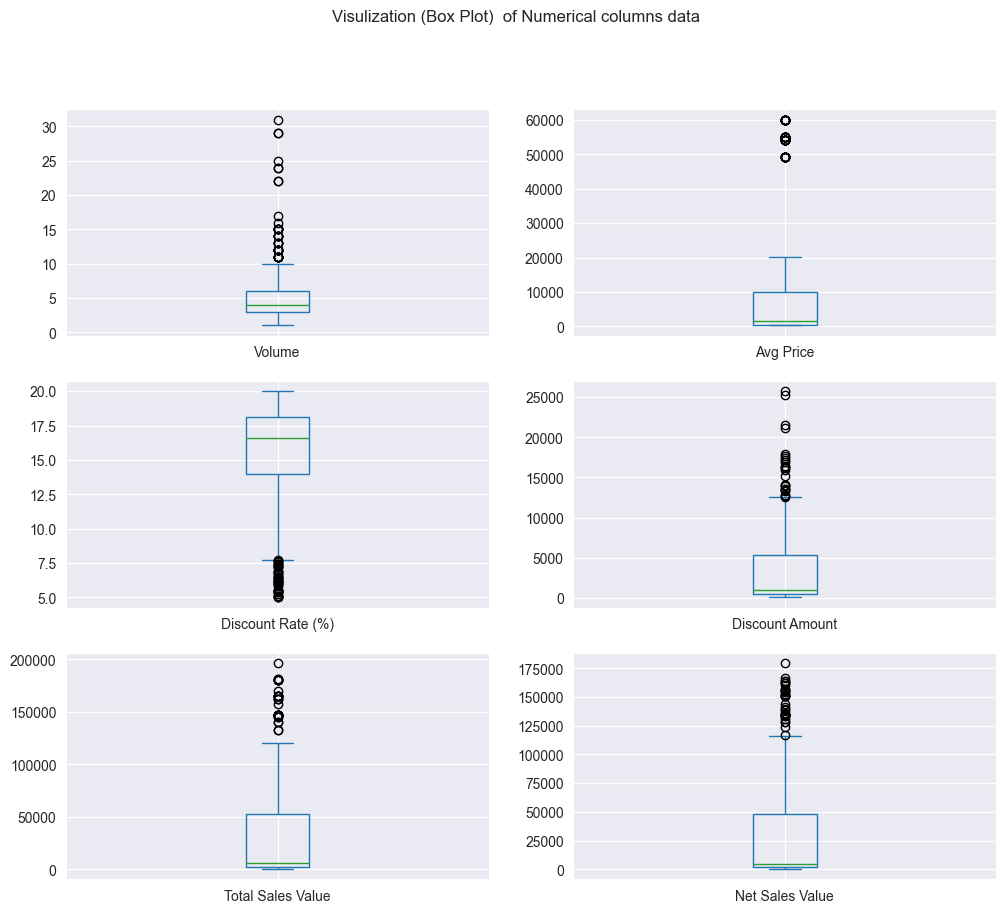

In [124]:
figdf1, axessbi = plt.subplots(3, 2, figsize=(12,10))
plt.suptitle("Visulization (Box Plot)  of Numerical columns data")
df1["Volume"].plot(kind="box",ax=axessbi[0,0])
df1["Avg Price"].plot(kind="box",ax=axessbi[0,1])
df1["Discount Rate (%)"].plot(kind="box",ax=axessbi[1,0])
df1["Discount Amount"].plot(kind="box",ax=axessbi[1,1])
df1["Total Sales Value"].plot(kind="box",ax=axessbi[2,0])
df1["Net Sales Value"].plot(kind="box",ax=axessbi[2,1])
#sns.boxplot(x='BU', y="Total Sales Value",hue="Brand", data=df1,ax=axessbi[1,0])
#sns.boxplot(x='BU', y="Volume",hue="Brand", data=df1,ax=axessbi[1,1])
#sns.boxplot(df1['Total Sales Value'],ax=axessbi[1,2])
#sns.boxplot(x='BU', y="Discount Amount",hue="Brand", data=df1,ax=axessbi[1,2])

In [125]:
#calculate the inter quartile range(IQR) of boxplots.
def iqr(n):
    Q1=n.quantile(0.25)
    Q3=n.quantile(0.75)
    IQR=Q3-Q1
    UE=Q3+1.5*IQR
    LE=Q1-1.5*IQR
    return print(f"IQR:{IQR}, UE:{UE}, LE:{LE}")

In [126]:
for columns in df1_num.columns:
    iqr1=iqr(df1_num[columns])
    print(f"{columns}\n{iqr1}")

IQR:3.0, UE:10.5, LE:-1.5
Volume
None
IQR:9635.0, UE:24552.5, LE:-13987.5
Avg Price
None
IQR:50500.0, UE:128950.0, LE:-73050.0
Total Sales Value
None
IQR:4.149655934050962, UE:24.339202378829146, LE:7.740578642625298
Discount Rate (%)
None
IQR:4856.03612280112, UE:12600.54961088833, LE:-6823.594880316146
Discount Amount
None
IQR:45645.70420627015, UE:116316.46916099661, LE:-66266.347664084
Net Sales Value
None


Summary of Box plots:
All numerical columns have outliers above upper extreme except Discount rate column
Volume: have outliers above upper extreme because of high-selling SKUs.
Avg Price: Having a high IQR, with a few outliers of extremely high prices.
Total Sales Value: Have significant outliers indicates that some transactions generated much higher sales.
Discount Rate (%): Distribution is compact as comaperd to others with includes some higher discounts.
Discount Amount: Have many large outliers,indicates some very large discounts.
Net Sales Value: Presents outliers with very high values.

Bar Chart Analysis for Categorical Column

In [127]:
#separate the categorical column as df1_obj
df1_obj=df1.select_dtypes(include="object")
df1_obj.head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


In [128]:
df1_obj.describe()

,Date,Day,SKU,City,BU,Brand,Model
count,450,450,450,450,450,450,450
unique,15,7,30,1,3,9,30
top,01-04-2021,Thursday,M01,C,Mobiles,Jeera,RU-10
freq,30,90,15,450,150,90,15


Summary of categorical columns:
Out of all day thursday has more transcations.
In the BU: Out of 3 category the transcation is higher in mobile section.
While in the perspective of brands Jeera has high frequency.


Visualisation of categorical column(Bar chart)

<Axes: xlabel='Model'>

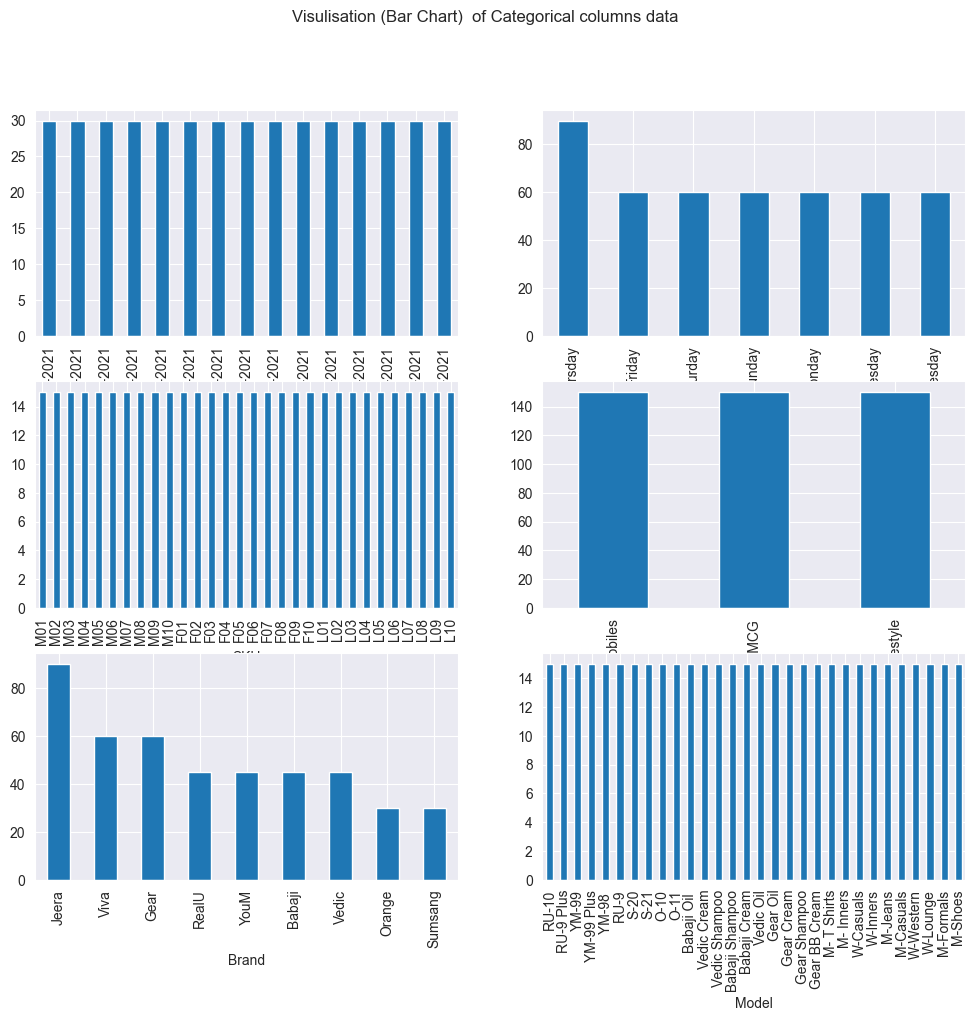

In [129]:
figdf1, axessbi = plt.subplots(3, 2, figsize=(12,10))
plt.suptitle("Visulisation (Bar Chart)  of Categorical columns data")
#pd.crosstab(df1.BU,df1.Brand).plot(kind='bar',ax=axessbi[0,0])
df1['Date'].value_counts().plot(kind='bar',ax=axessbi[0,0])
df1['Day'].value_counts().plot(kind='bar',ax=axessbi[0,1])
df1['SKU'].value_counts().plot(kind='bar',ax=axessbi[1,0])
df1['BU'].value_counts().plot(kind='bar',ax=axessbi[1,1])
df1['Brand'].value_counts().plot(kind='bar',ax=axessbi[2,0])
df1['Model'].value_counts().plot(kind='bar',ax=axessbi[2,1])
#sns.barplot(df1,x="Day",y="Total Sales Value",ax=axessbi[2,1])

Summary from visualization:
There are no outlier in all categorical column except Brand(Jeera) and Day(Thursday)

Standardization of numerical variables:

Standardization(z):
This technique is used for convert the data to a single range(-3<z<3) of values irrespective of their units of measurments.Hence, while plotting we can show them in a single plot meaningfully.
    And we can calculated its standardize value(z) as follows:
                    z=(x-u)/sigma
            where, x is the value, u is the mean, sigma is the standard deviation.


In [130]:
#standrdize
stnd_df = df1.copy()
for column in df1_num.columns:
    mean = df1[column].mean()
    std = df1[column].std()
    stnd_df[column] = (df1[column] - mean) / std
stnd_df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [131]:
stnd_df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.144833e-17,4.342206e-17,1.578984e-17,-4.144833e-17,-6.315935e-17,1.973730e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00


Visualization of standardization data

<Axes: xlabel='Net Sales Value', ylabel='Density'>

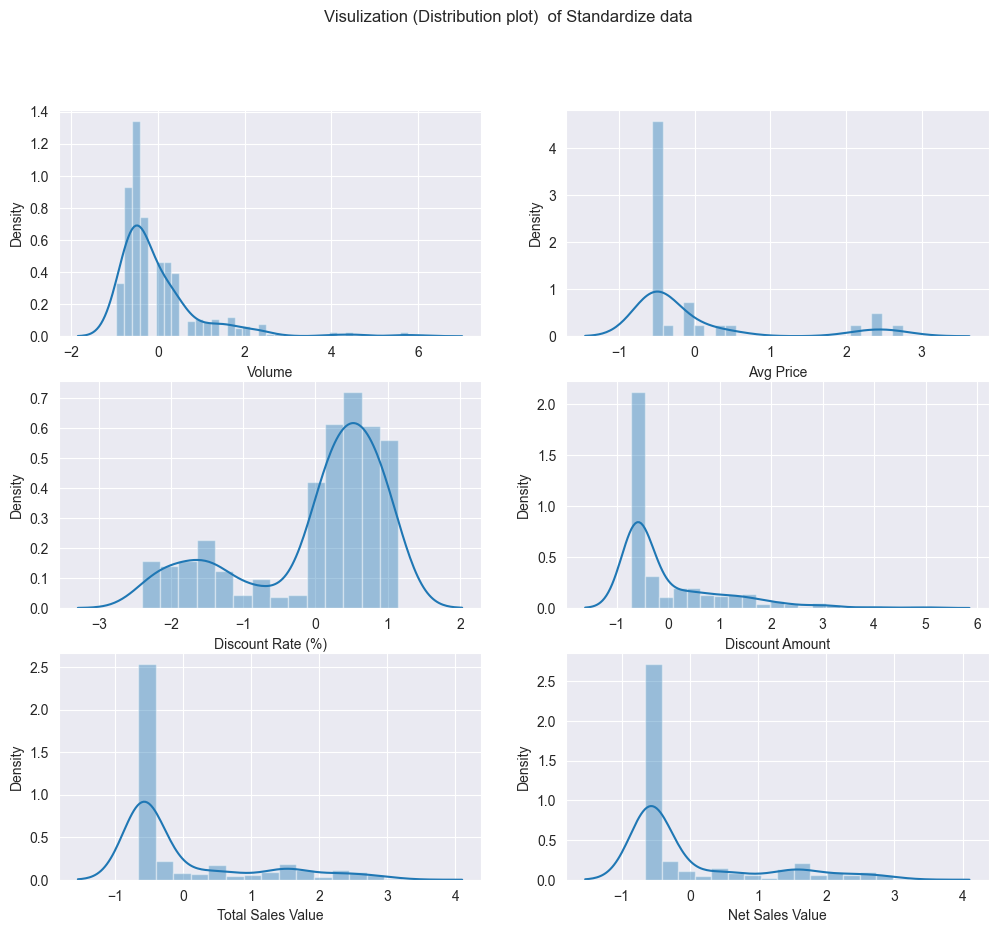

In [132]:
figdf1, axessbi = plt.subplots(3, 2, figsize=(12,10))
plt.suptitle("Visulization (Distribution plot)  of Standardize data")
sns.distplot(stnd_df["Total Sales Value"],ax=axessbi[2,0])
sns.distplot(stnd_df["Volume"],ax=axessbi[0,0])
sns.distplot(stnd_df["Discount Rate (%)"],ax=axessbi[1,0])
sns.distplot(stnd_df["Discount Amount"],ax=axessbi[1,1])
sns.distplot(stnd_df["Avg Price"],ax=axessbi[0,1])
sns.distplot(stnd_df["Net Sales Value"],ax=axessbi[2,1])

Comaprisons before and after:
Before standardization:
All variable maintain its original scale and spreadness.And the Total Sales Value, Discount Amount, and Net Sales Value show right-skewed distributions with high irregularity.
After standardization:
All features are centered around mean is 0 and standard deviation is 1. The distribution as skewness remains there, but the scale of the data is unified, which is much useful for many machine learning algorithms.

Conversion of Categorical data to Dummy variables

In modeling and machine learning most algorithms require numerical as input. So, they can't interpret string/categorical values directly. So we convert them to 0 and 1.There are other following reasons such as
 Avoid Implying Ordinal Relationships that is, it can misguide the model by assuming a order or rank between category which may not exist.
it will preserves the information without unusual disturbtions.

In [133]:
#convert only the categorical column into dummy variable.
df_obj=pd.get_dummies(df1_obj,columns=['Day', 'SKU', 'City', 'BU', 'Brand', 'Model'],dtype=int,drop_first=False)
df_obj

,Date,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,15-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,15-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,15-04-2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#convert only the categorical column into dummy variable with showing the numerical column(whole data)
df3=pd.get_dummies(df1,columns=['Day', 'SKU', 'City', 'BU', 'Brand', 'Model'],dtype=int,drop_first=False)
df3

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,15-04-2021,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visulaization:(plotting some meaningful plots to project some important information)

<Axes: xlabel='Day', ylabel='Total Sales Value'>

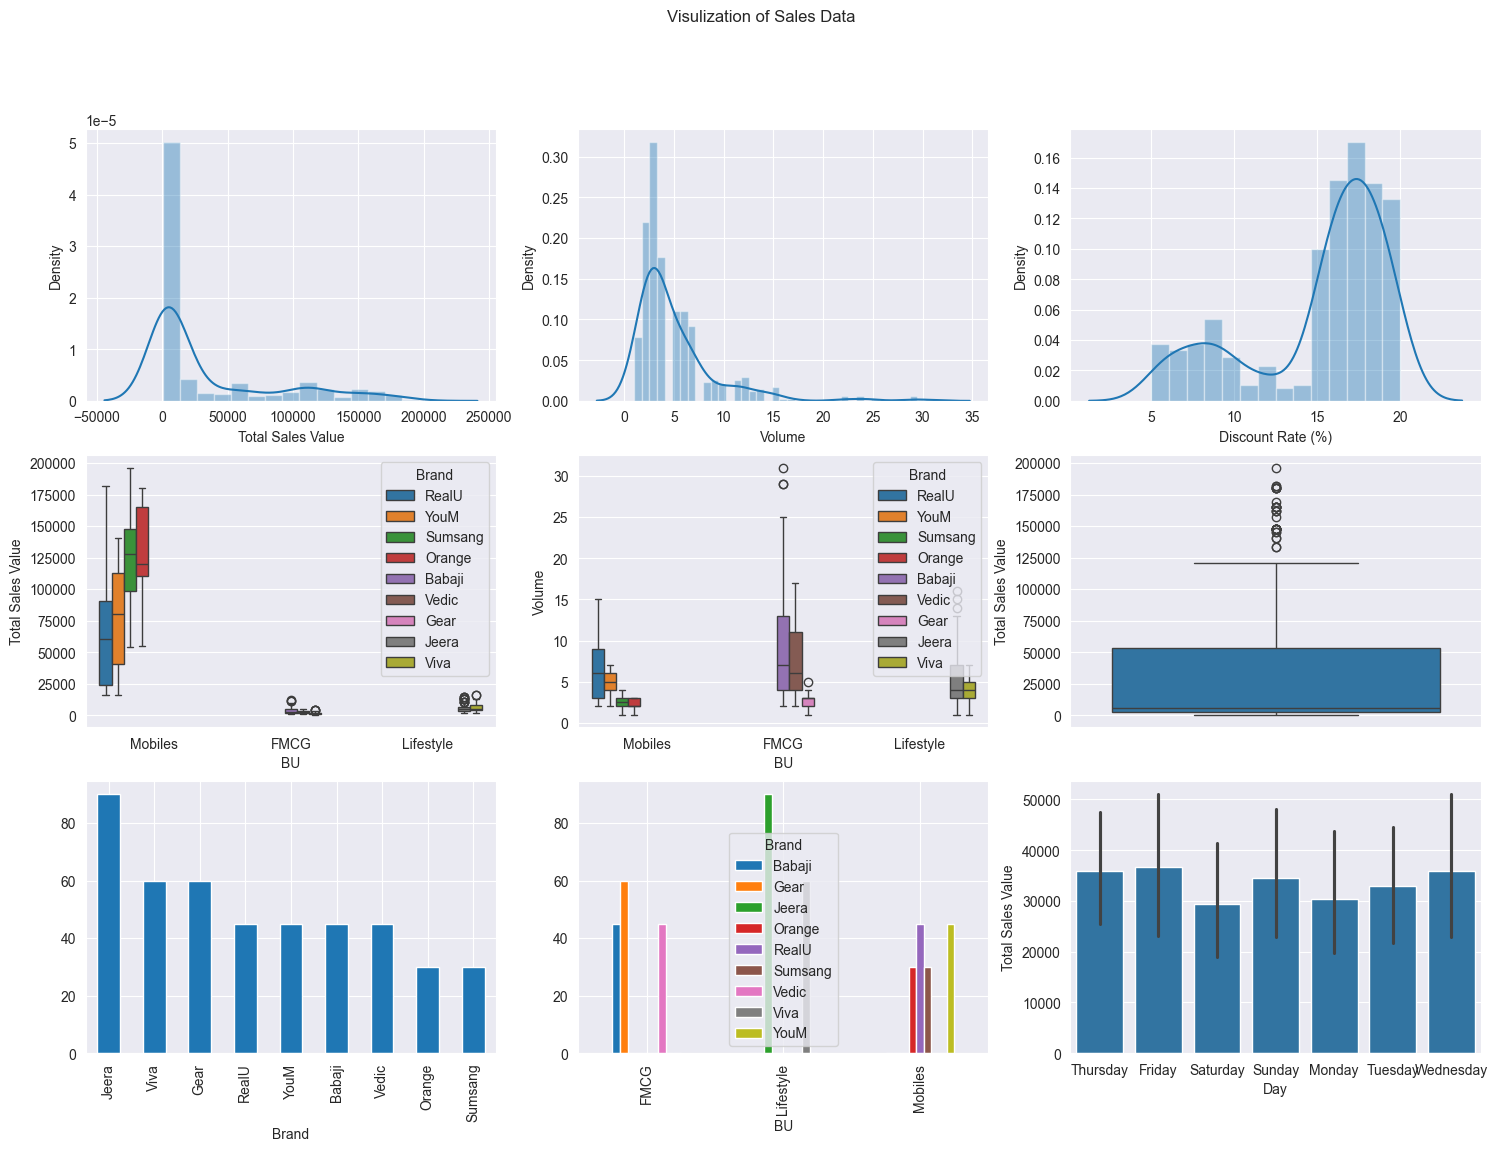

In [135]:
figdf1, axessbi = plt.subplots(3, 3, figsize=(18,12))
plt.suptitle("Visulization of Sales Data")
sns.distplot(df1["Total Sales Value"],ax=axessbi[0,0])
sns.distplot(df1["Volume"],ax=axessbi[0,1])
sns.distplot(df1["Discount Rate (%)"],ax=axessbi[0,2])
sns.boxplot(x='BU', y="Total Sales Value",hue="Brand", data=df1,ax=axessbi[1,0])
sns.boxplot(x='BU', y="Volume",hue="Brand", data=df1,ax=axessbi[1,1])
sns.boxplot(df1['Total Sales Value'],ax=axessbi[1,2])
#sns.boxplot(x='BU', y="Discount Amount",hue="Brand", data=df1,ax=axessbi[1,2])
df1['Brand'].value_counts().plot(kind='bar',ax=axessbi[2,0])
#sns.barplot(df1,x="Day",y="Total Sales Value",hue="Brand",ax=axessbi[2,0])
pd.crosstab(df1.BU,df1.Brand).plot(kind='bar',ax=axessbi[2,1])
#df1['Day'].value_counts().plot(kind='bar',ax=axessbi[2,2])
sns.barplot(df1,x="Day",y="Total Sales Value",ax=axessbi[2,2])

Key points from above frame plot:
BU vs Total sales value:We can see here the prices are much higher in mobiles section of
print(BU),But we can't see clearly the outliers in FMCG and Life style of BU.
BU vs volume:This plot indicates that FMCG of BU has higher volume than others.

We can separate the BU categories for much clarity visulaization

In [136]:
df1_mob=df1[df1['BU']=="Mobiles"]#separate the mobile data
df1_fmcg=df1[df1["BU"]=="FMCG"]#separate the fmcg data
df1_lsty=df1[df1["BU"]=="Lifestyle"] #separate the lifestyle data

<Axes: xlabel='Brand', ylabel='Total Sales Value'>

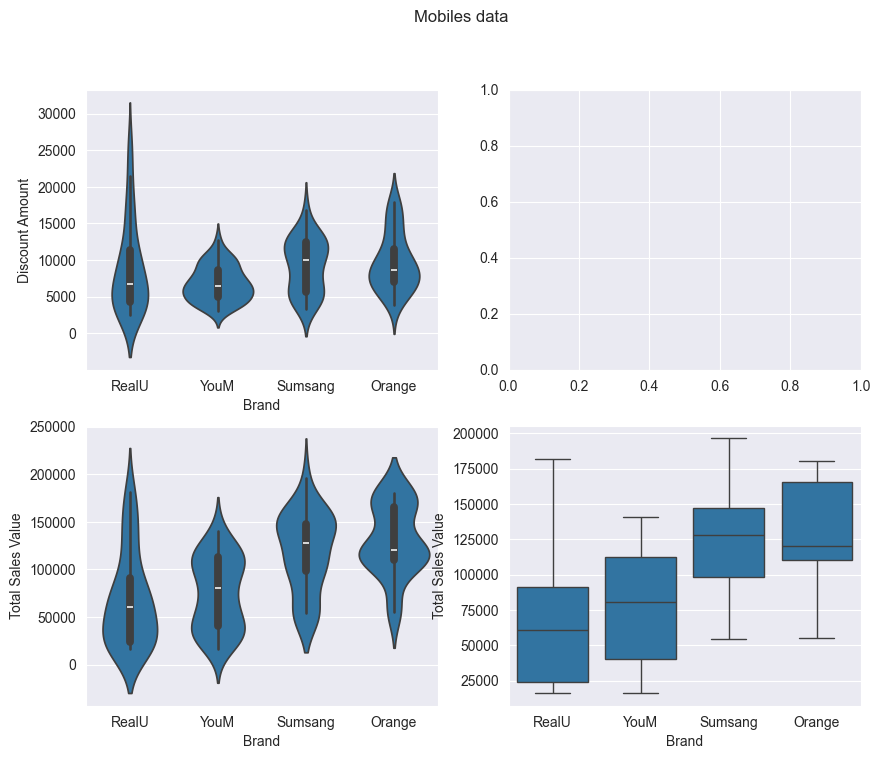

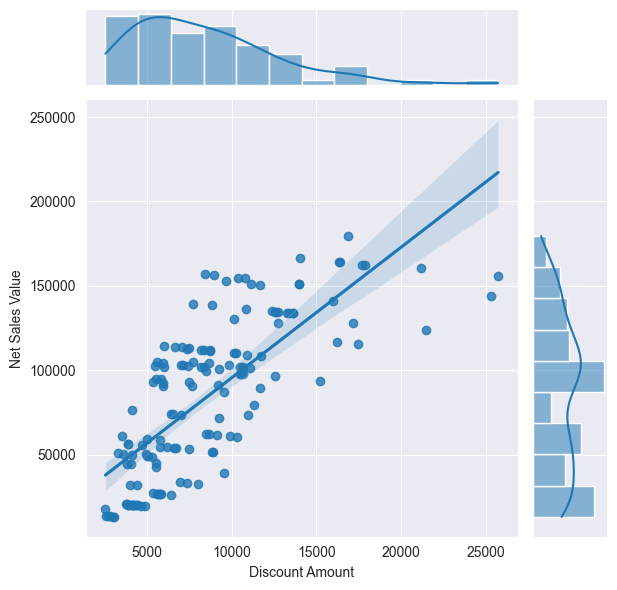

In [137]:
figrbi, axessbi = plt.subplots(2, 2, figsize=(10,8))
plt.suptitle("Mobiles data")
sns.violinplot(x="Brand",y="Discount Amount",data=df1_mob,ax=axessbi[0,0])
sns.jointplot(x="Discount Amount",y='Net Sales Value',data=df1_mob,kind="reg",ax=axessbi[0,1])
sns.violinplot(x="Brand",y="Total Sales Value",data=df1_mob,ax=axessbi[1,0])
sns.boxplot(x='Brand', y="Total Sales Value", data=df1_mob,ax=axessbi[1,1])

Mobile data:
Discount amount and the net sale values highly coorelated.
Discount amount has few outliers in RealU.
And the most of discount amount is less than 15000.

<Axes: xlabel='Brand', ylabel='Discount Rate (%)'>

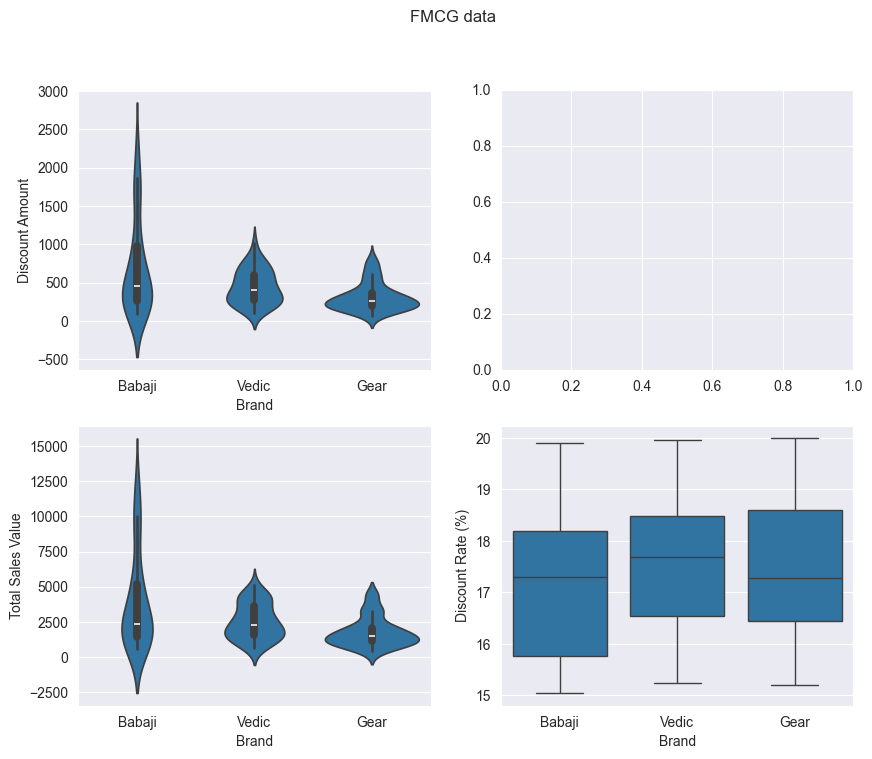

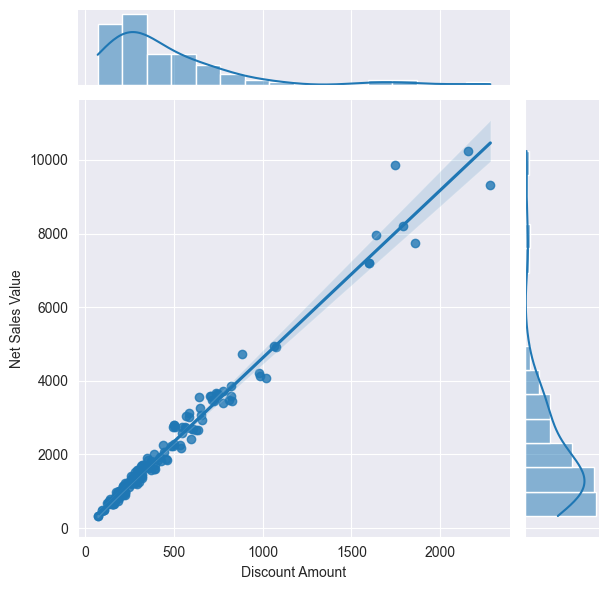

In [138]:
figrbi, axessbi = plt.subplots(2, 2, figsize=(10,8))
plt.suptitle("FMCG data")
sns.violinplot(x="Brand",y="Discount Amount",data=df1_fmcg,ax=axessbi[0,0])
sns.jointplot(x="Discount Amount",y='Net Sales Value',data=df1_fmcg,kind="reg",ax=axessbi[0,1])
sns.violinplot(x="Brand",y="Total Sales Value",data=df1_fmcg,ax=axessbi[1,0])
sns.boxplot(x='Brand', y="Discount Rate (%)", data=df1_fmcg,ax=axessbi[1,1])

FMCG data:
Discount amount and the net sale values highly coorelated.
discount amount and net sales values has outliers in Babaji Brand.
And the most of discount amount is less than 1000.

<Axes: xlabel='Brand', ylabel='Discount Rate (%)'>

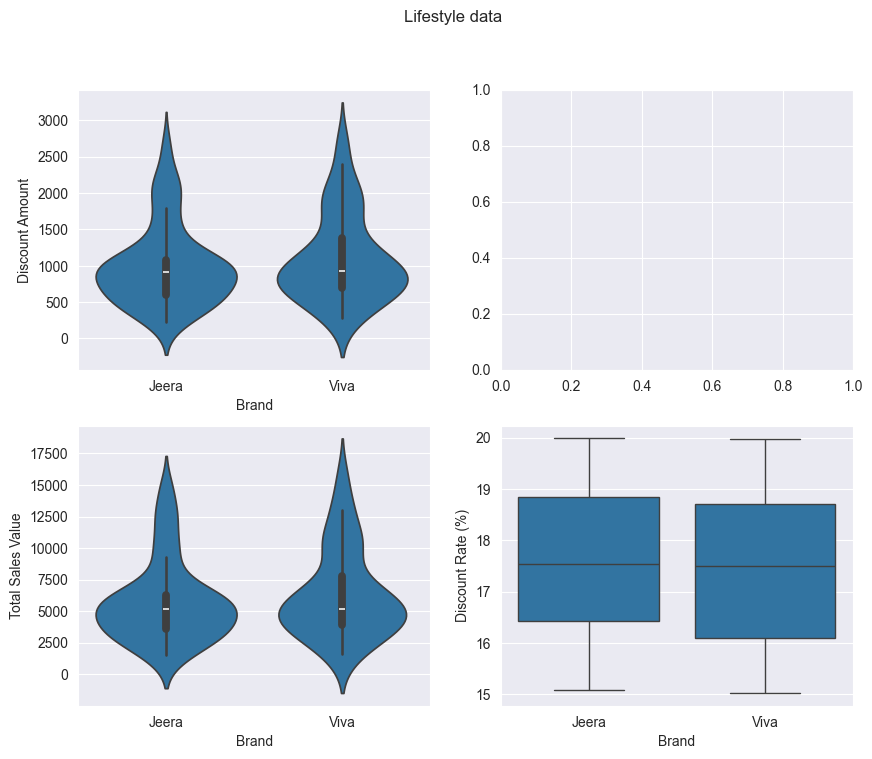

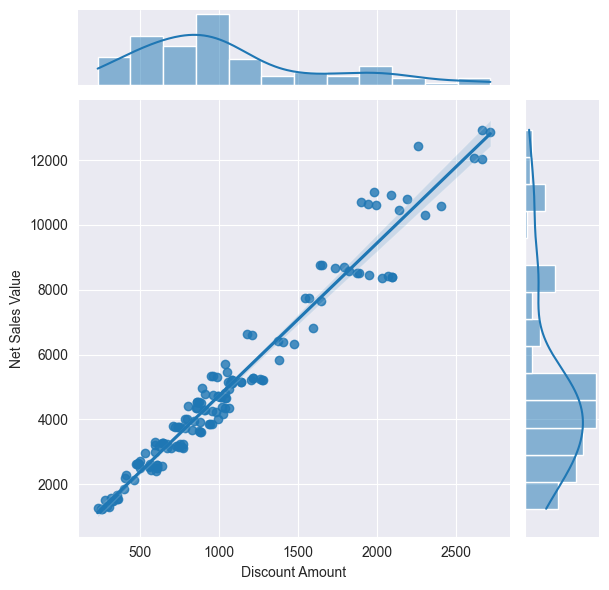

In [139]:
figrbi, axessbi = plt.subplots(2, 2, figsize=(10,8))
plt.suptitle("Lifestyle data")
sns.violinplot(x="Brand",y="Discount Amount",data=df1_lsty,ax=axessbi[0,0])
sns.jointplot(x="Discount Amount",y='Net Sales Value',data=df1_lsty,kind="reg",ax=axessbi[0,1])
sns.violinplot(x="Brand",y="Total Sales Value",data=df1_lsty,ax=axessbi[1,0])
sns.boxplot(x='Brand', y="Discount Rate (%)", data=df1_lsty,ax=axessbi[1,1])

Lifestyle data:
Discount amount and the net sale values highly
Discount amount has few outliers in RealU
And the most of discount amount is from (500-1500)

# Conclusion:
## Numerical columns (Boxplots & Distributions):
### Outliers present:
Volume, Total Sales Value, and Discount Amount present significant outliers. this is beacause high-volume or high-value transactions.

### Skeweness:
Total Sales Value, Net Sales Value, and Discount Amount showed right-skewed distributions.

## Categorical Features (Bar Charts):
#### The ditributions of Day and City show that data is not uniformly distributed, it indicates that either one of the days(Thursday) or city(C) is dominated.
#### Brand and Model  has large number of entries with a few relavant information

## Standardization (Z-Score Normalization):
### Before standardization:
variables maintain its original(vastly different) scale and spreadness which might effect in model building.
### After standardization:
All numerical columns have mean is 0 and standard deviation is 1. Although the shape of distributions remains the same, but their scale is compatible ML algorithms.

## Reflection on the Importance of Data Preprocessing
### Standardization:
It make sure varibales contribute equally to models. By Preventing the large-scale variables from dominating others.
### One-Hot Encoding:
It Converts categorical variables into numerical.It is important for models that require numeric input.
### Outlier Detection:
It helps to improve model performance and stability.
### Handling Skewness:
It helps to satisfy the assumptions of many models such as normality in linear regression.

## In Machine Learning:
If the data is unprocessed it can mislead models and reduce accuracy. By Encoding categorical data properly avoids dummy variable traps and improves on decision of a model.